In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [2]:
data_dir = "C:/Users/PC/Documents/HRproject/captured_images/"

In [3]:
img_height,img_width=180,180
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 66 files belonging to 10 classes.
Using 53 files for training.


In [4]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 66 files belonging to 10 classes.
Using 13 files for validation.


In [5]:
class_names = train_ds.class_names
print(class_names)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


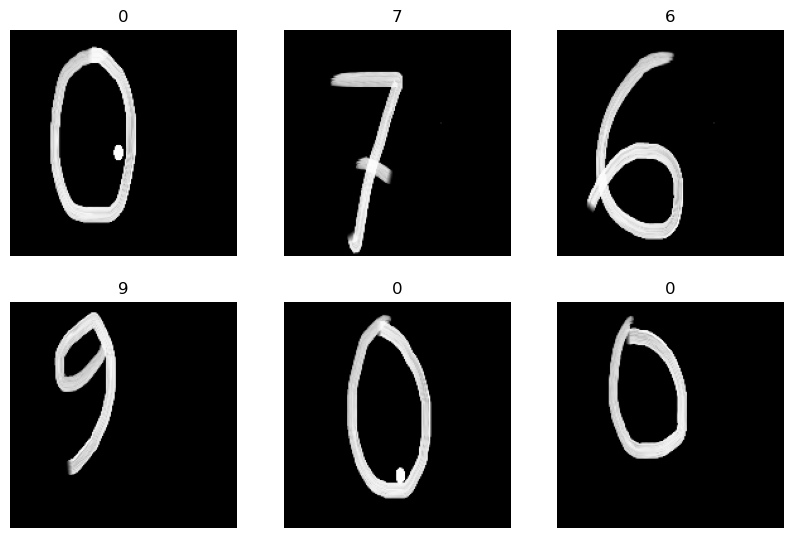

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(6):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [7]:
resnet_model = Sequential()

# pretrained_model= tf.keras.applications.ResNet50(include_top=False,
#                    input_shape=(180,180,3),
#                    pooling='avg',classes=10,
#                    weights='imagenet')

pretrained_model= tf.keras.applications.VGG16(
    include_top=False,
    weights="imagenet",
    input_shape=(180,180,3),
    pooling='avg',
    classes=10,
    classifier_activation="softmax")


for layer in pretrained_model.layers:
        layer.trainable=True

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(10, activation='softmax'))

In [8]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 module_wrapper (ModuleWrapp  (None, 512)              0         
 er)                                                             
                                                                 
 module_wrapper_1 (ModuleWra  (None, 512)              262656    
 pper)                                                           
                                                                 
 module_wrapper_2 (ModuleWra  (None, 10)               5130      
 pper)                                                           
                                                                 
Total params: 14,982,474
Trainable params: 14,982,474
Non-trainable params: 0
____________________________________________

In [9]:
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [10]:
epochs=10
history = resnet_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)
    

Epoch 1/10
2/2 [==============================] - 53s 22s/step - loss: 7.6377 - accuracy: 0.1132 - val_loss: 200.3456 - val_accuracy: 0.0769
Epoch 2/10
2/2 [==============================] - 50s 21s/step - loss: 120.6156 - accuracy: 0.1132 - val_loss: 4.7198 - val_accuracy: 0.1538
Epoch 3/10
2/2 [==============================] - 50s 22s/step - loss: 3.5232 - accuracy: 0.0755 - val_loss: 2.5547 - val_accuracy: 0.0000e+00
Epoch 4/10
2/2 [==============================] - 53s 24s/step - loss: 2.3856 - accuracy: 0.1132 - val_loss: 2.3775 - val_accuracy: 0.0769
Epoch 5/10
2/2 [==============================] - 51s 22s/step - loss: 2.3072 - accuracy: 0.0943 - val_loss: 2.3308 - val_accuracy: 0.0769
Epoch 6/10
2/2 [==============================] - 50s 21s/step - loss: 2.2753 - accuracy: 0.2075 - val_loss: 2.2947 - val_accuracy: 0.1538
Epoch 7/10
2/2 [==============================] - 55s 22s/step - loss: 2.2298 - accuracy: 0.2075 - val_loss: 2.3257 - val_accuracy: 0.0769
Epoch 8/10
2/2 [===

In [11]:
result = resnet_model.evaluate(val_ds)


1/1 [==============================] - 4s 4s/step - loss: 2.2963 - accuracy: 0.1538


C:\Users\PC\Documents\HRproject\captured_images\0\0.png


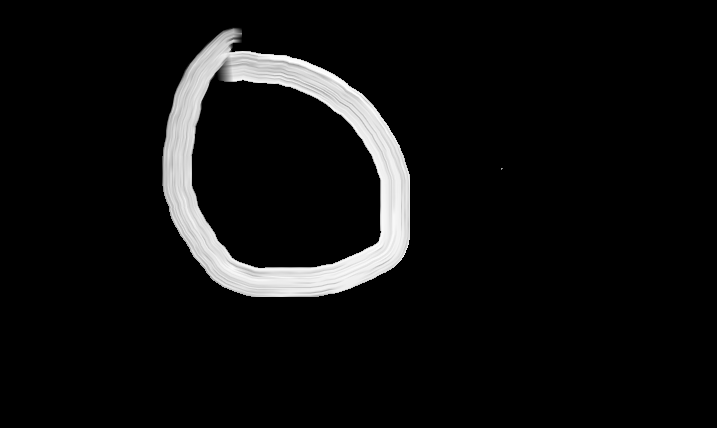

In [12]:
import pathlib
data_dir = pathlib.Path(data_dir)

roses = list(data_dir.glob('0/*'))
print(roses[0])
PIL.Image.open(str(roses[0]))

In [13]:
import cv2
image=cv2.imread(str(roses[0]))
image_resized= cv2.resize(image, (img_height,img_width))
image=np.expand_dims(image_resized,axis=0)
print(image.shape)

(1, 180, 180, 3)


In [14]:
pred=resnet_model.predict(image)
print(pred)

1/1 [==============================] - 1s 1s/step
[[0.29399225 0.09062445 0.07594651 0.06266724 0.07352333 0.09076742
  0.09859763 0.06219304 0.05948552 0.09220263]]


In [15]:
output_class=class_names[np.argmax(pred)]
print("The predicted class is", output_class)

The predicted class is 0


In [16]:
# #prediction of image drawn in paint
# from PIL import Image
# import joblib
# import cv2
# import numpy as np #pip install numpy
# import time
# import pyscreenshot as ImageGrab
 
# # model=joblib.load("model/digit_recognizer")
# model = resnet_model
# images_folder="img/"
 
# while True:
#     img=ImageGrab.grab(bbox=(8, 196,725, 624))
#     img.save(images_folder+"img.png")
#     im = cv2.imread(images_folder+"img.png")
    
#     image_resized= cv2.resize(im, (img_height,img_width))
#     image=np.expand_dims(image_resized,axis=0)
#     predictions  =model.predict(image)
#     predictions = class_names[np.argmax(predictions)]
#     print("Prediction:",predictions)
#     cv2.putText(im, "Prediction is: "+str(predictions), (20,20), 0, 0.8,(0,255,0),2,cv2.LINE_AA)

#     cv2.startWindowThread()
#     cv2.namedWindow("Result")
#     cv2.imshow("Result",im)
#     cv2.waitKey(10000)
#     if cv2.waitKey(1)==13: #27 is the ascii value of esc, 13 is the ascii value of enter
#        break

    
       
# cv2.destroyAllWindows()
 
